# Part I - (Ford GoBike System Data):

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Also, This document explores a dataset containing and there are approximately "183412" rides.


## Preliminary Wrangling


### import all packages:

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Reading csv file with removing the index column and take a look at the dataframe and information provided.

In [125]:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv',index_col=False)
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Data Frame Features:

In [126]:
fordgobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Making a copy to save the fils for later processing:

In [127]:
fordgobike_df = fordgobike.copy()

#### Using a sample:

In [128]:
fordgobike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
134235,176,2019-02-08 17:47:41.3900,2019-02-08 17:50:38.2000,181.0,Grand Ave at Webster St,37.811377,-122.265192,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4519,Subscriber,1982.0,Male,No
43154,253,2019-02-22 16:58:05.2010,2019-02-22 17:02:18.7450,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4897,Subscriber,1993.0,Male,No
95003,479,2019-02-15 15:19:51.7710,2019-02-15 15:27:51.3690,129.0,Harrison St at 20th St,37.758862,-122.412544,87.0,Folsom St at 13th St,37.769757,-122.415674,3048,Subscriber,1970.0,Male,Yes
167130,1057,2019-02-04 17:31:35.3820,2019-02-04 17:49:12.6760,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,122.0,19th St at Mission St,37.760299,-122.418892,4933,Subscriber,1986.0,Male,No
153735,126,2019-02-06 11:53:58.8290,2019-02-06 11:56:05.3370,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,5176,Subscriber,1997.0,Female,No


#### Overview of data shape and composition

In [129]:
print(fordgobike_df.shape)

(183412, 16)


#### Checking data types and missing data:

In [130]:
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


#### Using describe method in order to get a Summary of digital data:

In [131]:
# descriptive statistics for numeric variables:
fordgobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Checking if there is any missing values:

In [132]:
fordgobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> There are 183412 bikers in the dataset with 16 features (duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type). Most variables are numeric in nature, but the variables start_station_name, end_station_name,user_type,member_gender, and bike_share_for_all_trip are categaroical variables with the following levels.

> member_gender: Male, Female, Other.
user_type: Subscriber, Customer.
bike_share_for_all_trip: Yes, No.
start_station_name: Market St at Dolores St,Grove St at Masonic  Ave, etc.
end_station_name: Berry St at 4th St,10th Ave at E 15th St, etc

### What is/are the main feature(s) of interest in your dataset?

> I am curious in figuring out what features are best for predicting bikers who will be shared for all trip in the dataset. Also, The main features include data related to the start and end of a ride. This will be used to calculate when bikes are in high or low demand. In addition, there is ample data related to the users of the bike service including age, gender, and whether they are a paying member of being subscriber or a customer.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and finish times,user_type, age as well as other time-related information, will be frequently utilised.

### Dropping the null values:

In [133]:
fordgobike_df = fordgobike_df.dropna()

#### Making sure there is any missing values:

In [134]:
fordgobike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Dsiplaying trips that have minimum duration of 61 seconds:

In [135]:
fordgobike_df[fordgobike_df['duration_sec']==61].count()

duration_sec               18
start_time                 18
end_time                   18
start_station_id           18
start_station_name         18
start_station_latitude     18
start_station_longitude    18
end_station_id             18
end_station_name           18
end_station_latitude       18
end_station_longitude      18
bike_id                    18
user_type                  18
member_birth_year          18
member_gender              18
bike_share_for_all_trip    18
dtype: int64

#### Dsiplaying the top 10 trips  with maximum duration:

In [136]:
fordgobike_df.nlargest(10,['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
107581,79548,2019-02-12 17:45:50.5360,2019-02-13 15:51:38.8590,79.0,7th St at Brannan St,37.773492,-122.403673,66.0,3rd St at Townsend St,37.778742,-122.392741,1718,Customer,1995.0,Female,No
90195,74408,2019-02-15 16:54:01.0600,2019-02-16 13:34:09.3670,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,86.0,Market St at Dolores St,37.769305,-122.426826,4714,Subscriber,1988.0,Male,No
86454,74097,2019-02-16 16:20:41.4650,2019-02-17 12:55:38.4670,99.0,Folsom St at 15th St,37.767037,-122.415443,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,6235,Subscriber,1980.0,Male,No
123383,73930,2019-02-10 13:03:36.4040,2019-02-11 09:35:46.4460,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,1333,Subscriber,1989.0,Female,No


In [137]:
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


### Cleaning Datasets:

#### Changing the dataype from object to datetime:¶

In [138]:
fordgobike_df['start_time'] = pd.to_datetime(fordgobike_df['start_time'])

fordgobike_df['end_time'] = pd.to_datetime(fordgobike_df['end_time'])

#### Calculating a user age and create an additional column to store calculated values.

In [139]:
fordgobike_df['member_age'] = round(2019 - fordgobike_df['member_birth_year'], 0)
fordgobike_df['member_age'] = fordgobike_df['member_age'].astype(int)
fordgobike_df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [140]:
### Maximun_age:

fordgobike_df['member_age'].max()

141

In [141]:
### Minimum_age:

fordgobike_df['member_age'].min()

18

In [142]:
### Average_age:

fordgobike_df['member_age'].mean()

34.196865425945404

### Displaying the outlier among age:

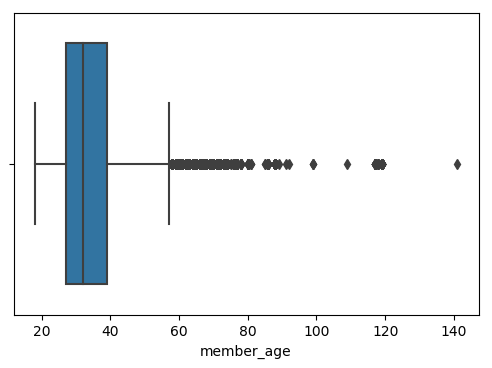

In [143]:
plt.figure(figsize=(6,4),dpi=100)
sns.boxplot(fordgobike_df['member_age']);

#### Droping rows with users of age over 80 years:

In [144]:
fordgobike_df = fordgobike_df.drop(fordgobike_df[fordgobike_df['member_age']> 100].index)

In [145]:
fordgobike_df['member_age'].describe()

count    174880.000000
mean         34.162043
std           9.974001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

In [146]:
fordgobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60


#### Removing 'user_type' and 'member_gender' and other features since we get the dummies in order to get a category values:

In [147]:
#Dropping unnecessary columns for this analysis:

fordgobike_df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [148]:
fordgobike_df.tail()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,23
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,35
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,29
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,31
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,Spear St at Folsom St,2nd St at Folsom St,1057,Subscriber,1989.0,Male,No,30


In [149]:
fordgobike_df.shape

(174880, 11)

In [150]:
fordgobike_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60


In [151]:
fordgobike_df['duration_sec'].describe()

count    174880.000000
mean        704.022358
std        1642.514884
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

## Univariate Exploration

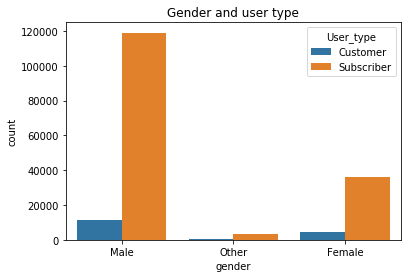

In [152]:
def plot_x(data, x, hue, x_label,y_label, legend, title):
    "Countplot of x with hue"
    sns.countplot(data=data,x=x, hue=hue)
    plt.xlabel('gender')
    plt.ylabel('count')
    plt.legend(title=legend)
    plt.title(title)

plot_x(data=fordgobike_df,x='member_gender', hue='user_type',x_label='gender',
      y_label='Count',legend='User_type',title='Gender and user type')

#### Displaying the user type count or frequency:

#### Q: What is the distribution of member by user type?

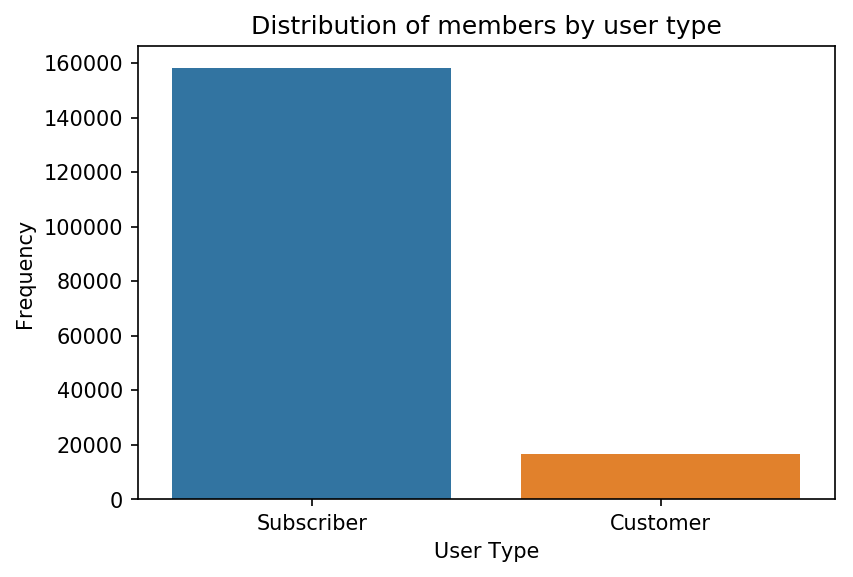

In [153]:
plt.figure(figsize=(6,4),dpi=150)
order = fordgobike_df['user_type'].value_counts().index
sns.countplot(data = fordgobike_df, x = 'user_type', order = order)
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('Distribution of members by user type');

> The above results show that the majority of members are subscribers, accounting for 90% of the total number of users.!

#### Q: How looks like the distribution of trip duration?

#### Plotting the distribution of trip duration

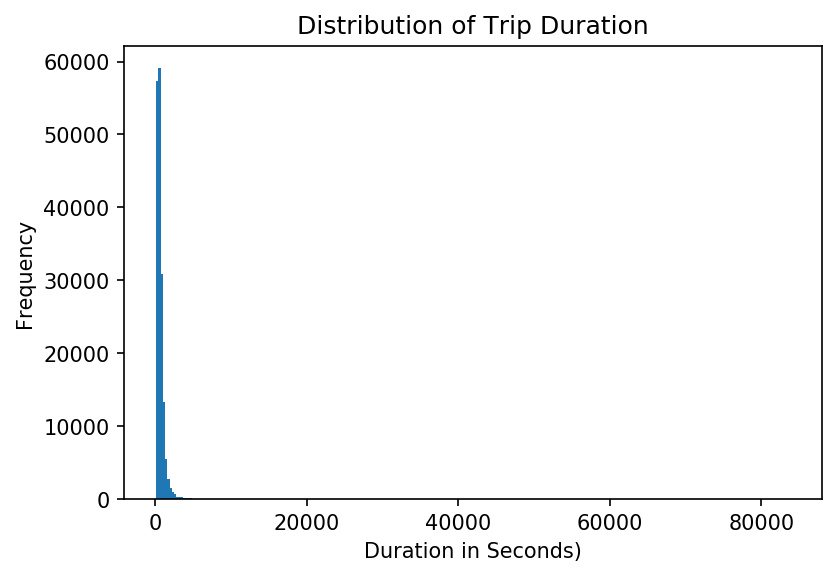

In [154]:
plt.figure(figsize=(6,4),dpi=150)
bins = np.arange(80, 84000, 300) 
plt.hist(data = fordgobike_df, x = 'duration_sec' , bins = bins)
plt.xlabel('Duration in Seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration');

> As shown above, the curve has a very long right tail. For this reason, we would like to take a closer look at SATA, with a logarithmic scale on the y-axis and limits on the x-axis, focusing on the most common time periods.!

#### Displaying the age distribution:

#### Q: How the sitribution of member ages are skewed?

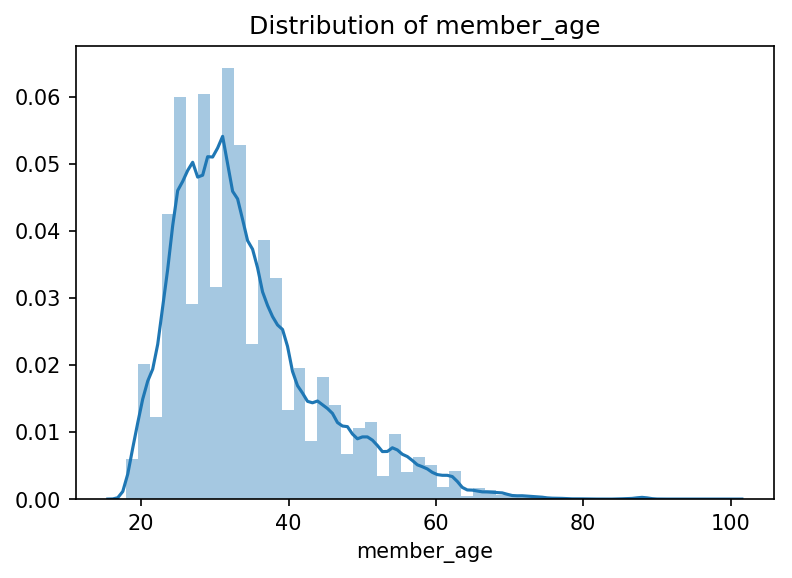

In [155]:
plt.figure(figsize=(6,4),dpi=150)
sns.distplot(fordgobike_df['member_age'])
plt.title('Distribution of member_age')
plt.xlabel('member_age');

> We can see the univariate right skewed distribution of the member_age.

#### Using another method for displaying the age distribution:

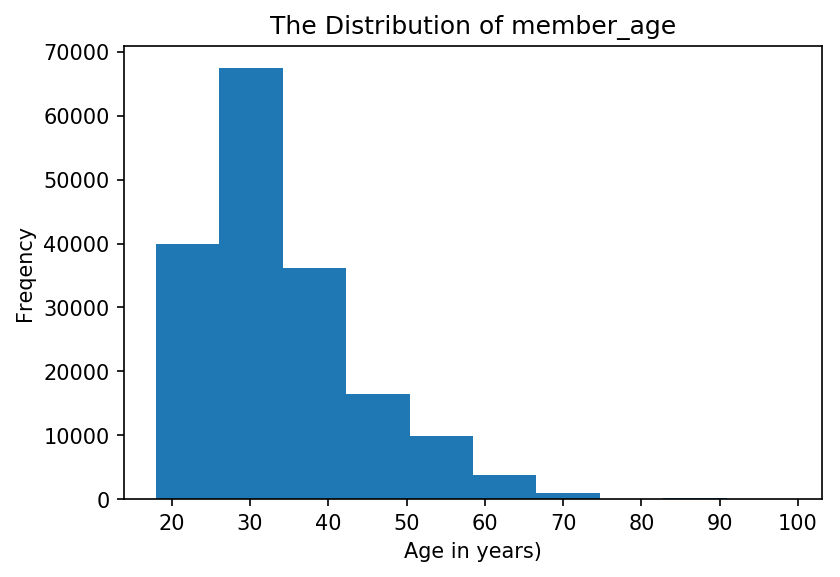

In [156]:
plt.figure(figsize=(6,4),dpi=150)
plt.hist(data = fordgobike_df, x = 'member_age')
plt.xlabel('Age in years)')
plt.ylabel('Freqency')
plt.title('The Distribution of member_age');

#### Plotting the user type count or frequency for member_gender:

#### Q: What is the frequency of user type for member_gender?

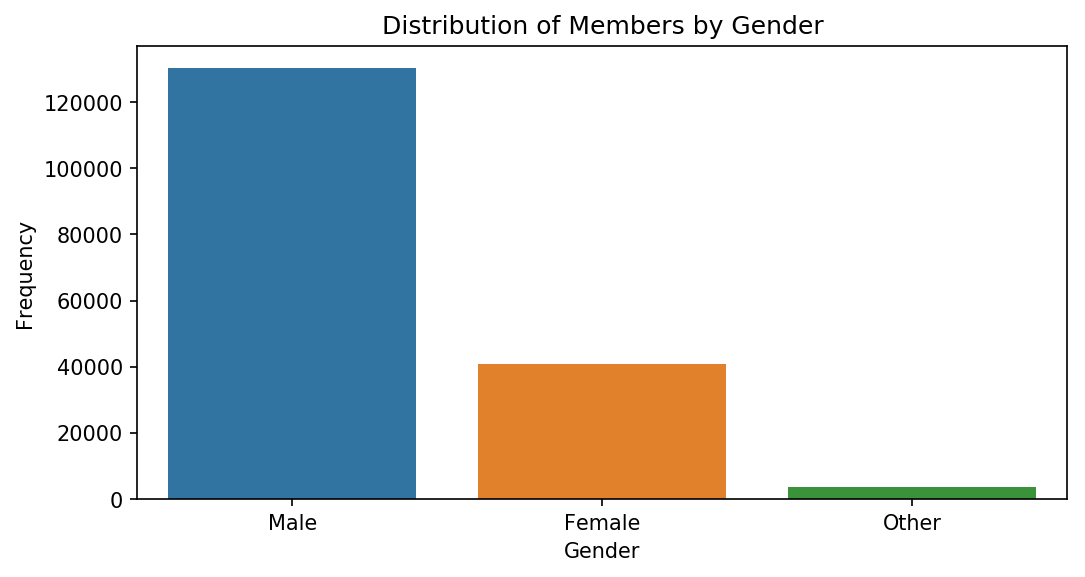

In [157]:
plt.figure(figsize=(8,4),dpi=150)
order = fordgobike_df['member_gender'].value_counts().index
sns.countplot(data = fordgobike_df, x= 'member_gender',order = order)

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Members by Gender');


In [158]:
### using value_counts for displying total of member_gender:
fordgobike_df['member_gender'].value_counts()

Male      130443
Female     40791
Other       3646
Name: member_gender, dtype: int64

> According to the above results, the majority of members are male, for almost 74% of the total users, while female members account for about 24% of the total users, and the remaining are neither Male nor Female.


#### Q: Hiw about sharing the bike for all trip?

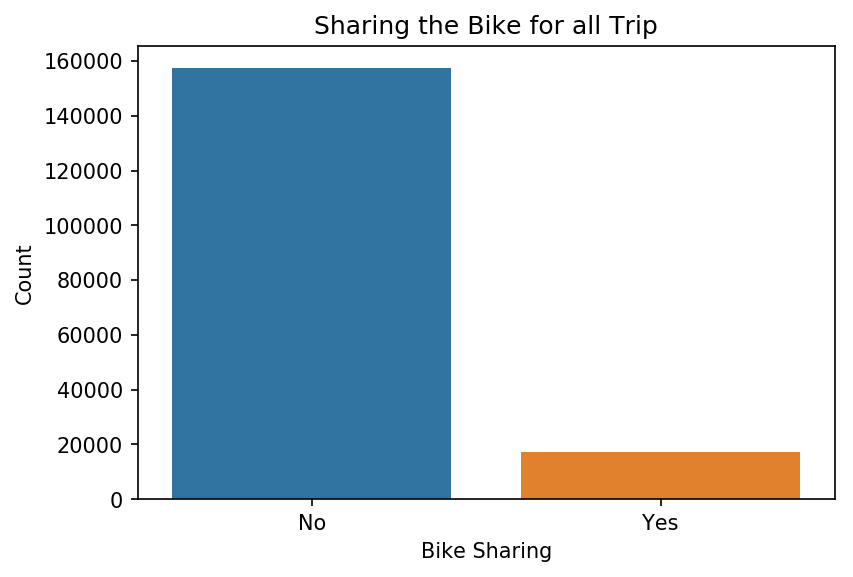

In [159]:
plt.figure(figsize=(6,4),dpi=150)
sns.countplot(data=fordgobike_df,x='bike_share_for_all_trip')
plt.xlabel('Bike Sharing')
plt.ylabel('Count')
plt.title('Sharing the Bike for all Trip');

> According to the plot above, the majority of users did not share the bike for the entire journey.

## Bivariate Exploration

#### Q: Is there any Correlation between data_stat variables in the dataset?

In [160]:
numeric_vars = ['duration_sec', 'member_age','member_birth_year', 'start_time', 'end_time']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

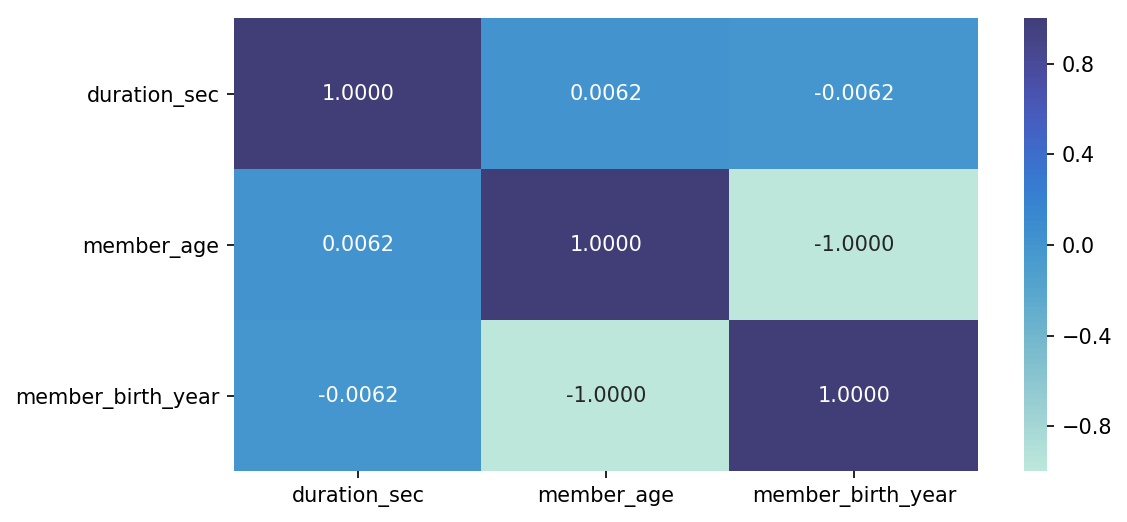

In [161]:
plt.figure(figsize=(8,4),dpi=150)
sns.heatmap(fordgobike_df[numeric_vars].corr(), annot = True, fmt = '.4f',
            center = 1.9);

> There are a low correlation between the member age of the user and duration second. 

#### Q: What is the average age by member_gender and user type for each ride? ¶

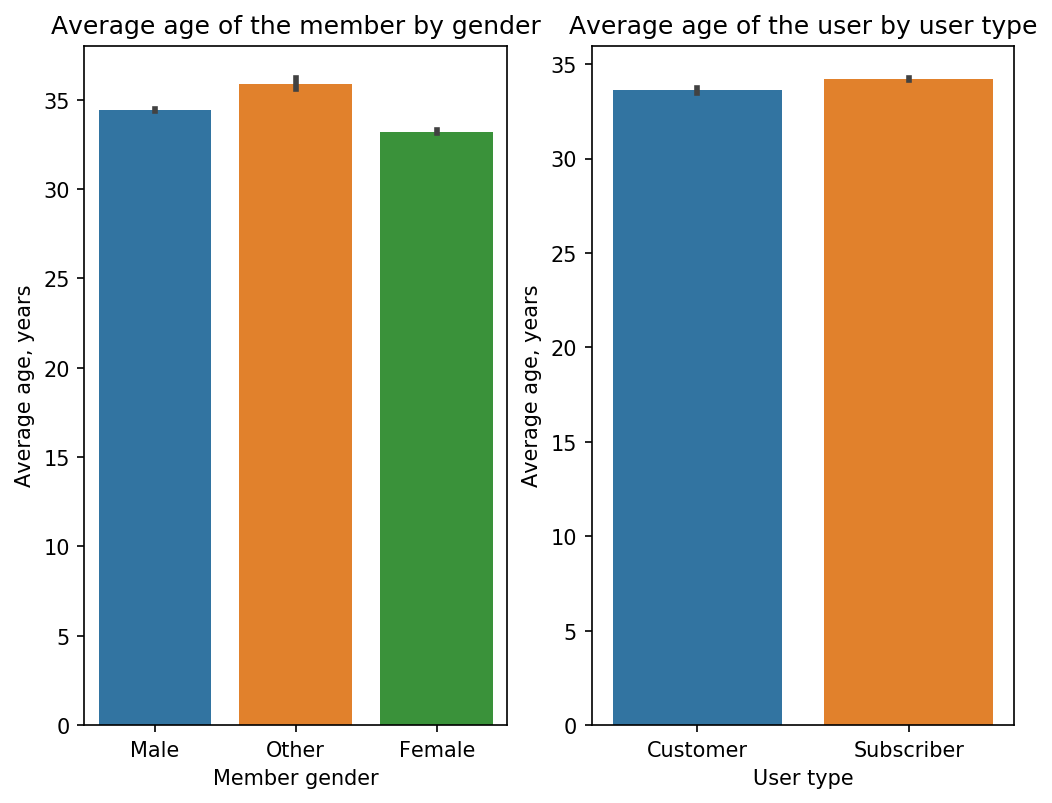

In [162]:
plt.figure(figsize=(8,6),dpi=150)
plt.subplot(1,2,1)
sns.barplot(data = fordgobike_df, x='member_gender', y='member_age')
plt.title('Average age of the member by gender')
plt.xlabel('Member gender')
plt.ylabel('Average age, years')
plt.subplot(1,2,2)
sns.barplot(data = fordgobike_df, x='user_type', y='member_age')
plt.title('Average age of the user by user type')
plt.xlabel('User type')
plt.ylabel('Average age, years');

> We can stated that the average age is almost the same for whole user. While the average age for male and female are less than other.

#### Q:Is there any connection between member_gender and user type?

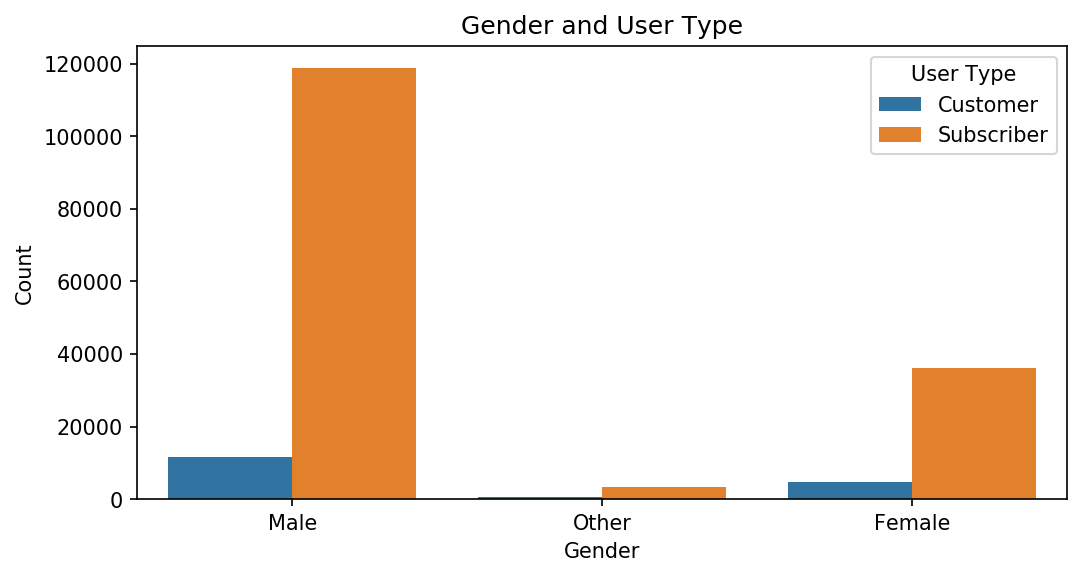

In [163]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(data=fordgobike_df,x='member_gender',hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='User Type')
plt.title('Gender and User Type');

> There does not seem to be any connection between gender and user type.

#### Dsiplaying and plotting the association between a member's age and how bikes are distributed for all excursions.
> I did look at the relationship between a member's age and how bikes are distributed for all excursions.!

#### Q:How looks like the association between bike sharing and age?

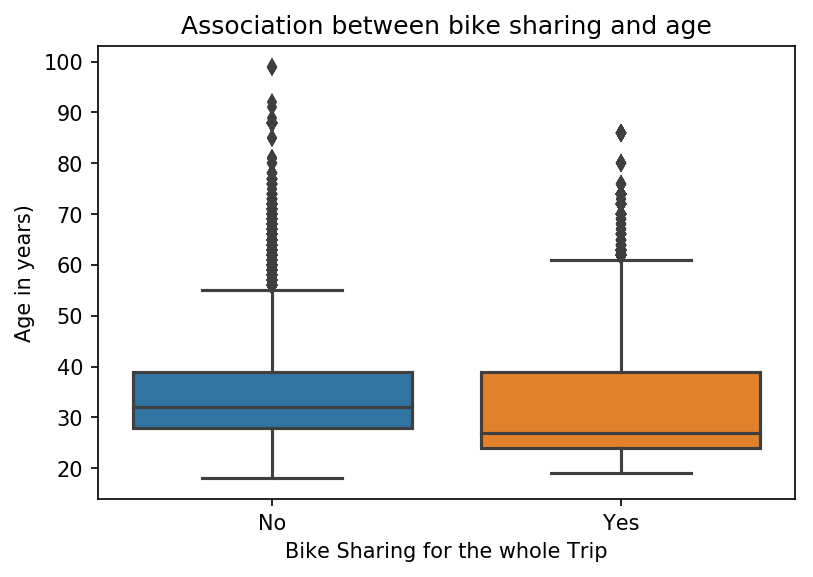

In [164]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data = fordgobike_df, x = 'bike_share_for_all_trip', y = 'member_age')
plt.xlabel('Bike Sharing for the whole Trip')
plt.ylabel('Age in years)');
plt.title('Association between bike sharing and age');

In [165]:
fordgobike_df.tail()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,23
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,35
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,29
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,31
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,Spear St at Folsom St,2nd St at Folsom St,1057,Subscriber,1989.0,Male,No,30


> The results above is shown that the young members were willing to share their bikes!

#### Q: Is there any correlation between age and duration secend?

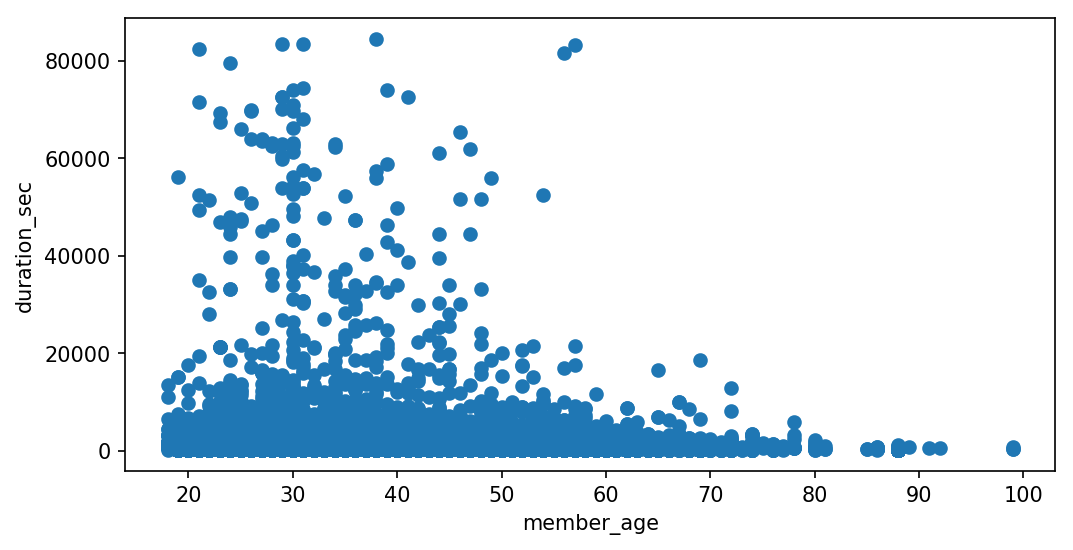

In [166]:
### scatter plot of member_age vs. duration_sec:
plt.figure(figsize=(8,4),dpi=150)
plt.scatter(data = fordgobike_df, x = 'member_age', y = 'duration_sec')
plt.xlabel('member_age')
plt.ylabel('duration_sec');

> From the scatter above, we can stated that there is a negative correlation between age and duration secend.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The user type subscriber go on a longer trip than the user type customer where the User subscriber are more than customer.



#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We can states that the relationship between a member's age and how bikes are distributed for all excursions.



## Multivariate Exploration


#### Q: Is there any correlation between age, gender, and bike sharing?

#### Plotting the association bewteen age, gender, and bike sharing

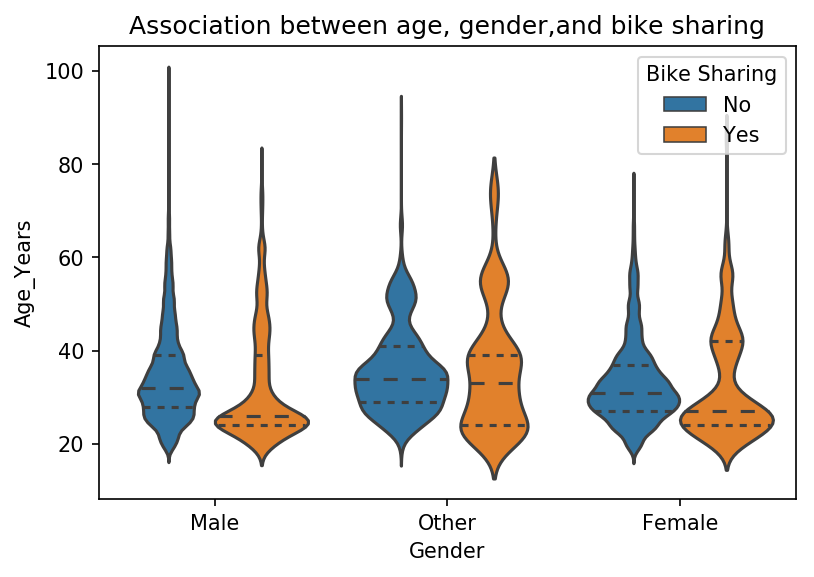

In [167]:
plt.figure(figsize =(6, 4),dpi=150)
sns.violinplot(data = fordgobike_df, x = 'member_gender', y = 'member_age', hue = 'bike_share_for_all_trip', inner = 'quartile')
plt.xlabel('Gender')
plt.ylabel('Age_Years')
plt.title('Association between age, gender,and bike sharing')
plt.legend(title='Bike Sharing');


> As illustrated above, bike sharing is associated with younger age groups across all genders. For example, the majority of the participants that share the bike for the full voyage are younger.
!



> It is surprise that it is challenging to pinpoint three traits that significantly have a good relationship.!

#### Which gender has more journeys compared to other?

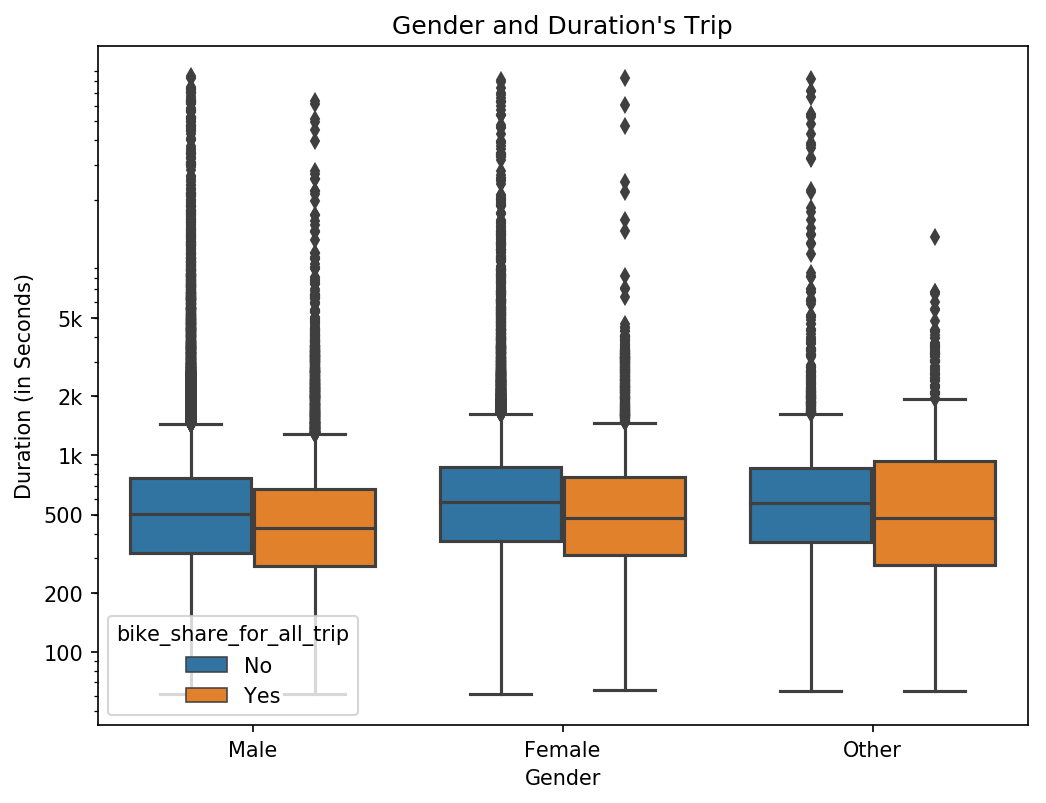

In [168]:
plt.figure(figsize=(8,6),dpi=150)
sns.boxplot(data=fordgobike_df,x='member_gender',y='duration_sec',order=['Male','Female','Other'],hue='bike_share_for_all_trip')
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Gender')
plt.ylabel('Duration (in Seconds)')
plt.title("Gender and Duration's Trip");

> As shown above in the boxplot, we  can see that the men have shorter journeys than the other genders. And femal, other who do not bike are almost same in temrs of duration second. In addition, bike sharing is inversely related to ride time for all trips.

#### Q: How relationships between user type, duration, member_age?

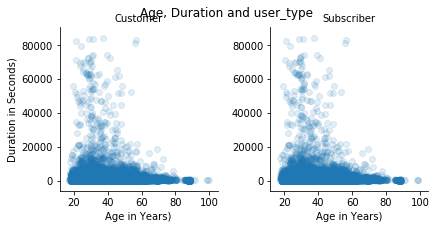

In [169]:
plt.figure(figsize =(6, 4),dpi=120)
h=sns.FacetGrid(data=fordgobike_df,col='user_type')
h.map(sns.regplot,data=fordgobike_df, x='member_age',y='duration_sec',fit_reg=False, x_jitter=0.7, scatter_kws={'alpha':1/8})
h.set_titles('{col_name}')
h.set_axis_labels('Age in Years)','Duration in Seconds)')
plt.suptitle('Age, Duration and user_type');

> As shown above, user type does not affect age-duration relationships.

#### Q: What is the trip duration between user_type and gender?

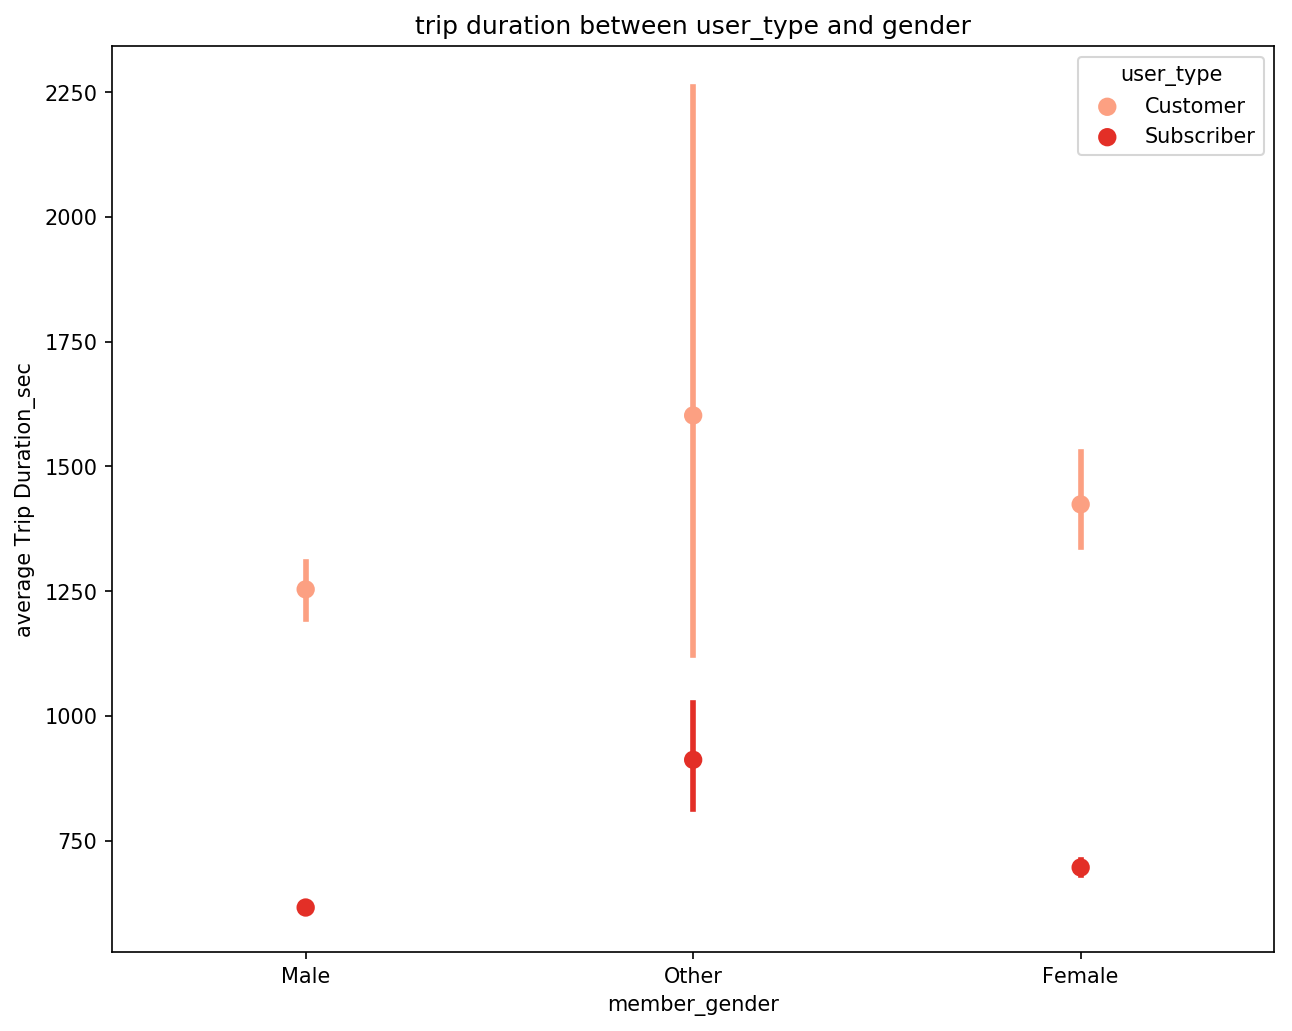

In [192]:
fig = plt.figure(figsize= (10,8),dpi=150)
ax = sns.pointplot(data = fordgobike_df, x ='member_gender', y = 'duration_sec', hue = 'user_type',                 
palette = 'Reds', linestyles = '')
plt.title('trip duration between user_type and gender')
plt.xlabel('member_gender');
plt.ylabel('average Trip Duration_sec');

>> As shown above the female and male gender group who are subscriber were traveling for the shortest duration. While other gender group were traveling for longest duration especially for customer user.



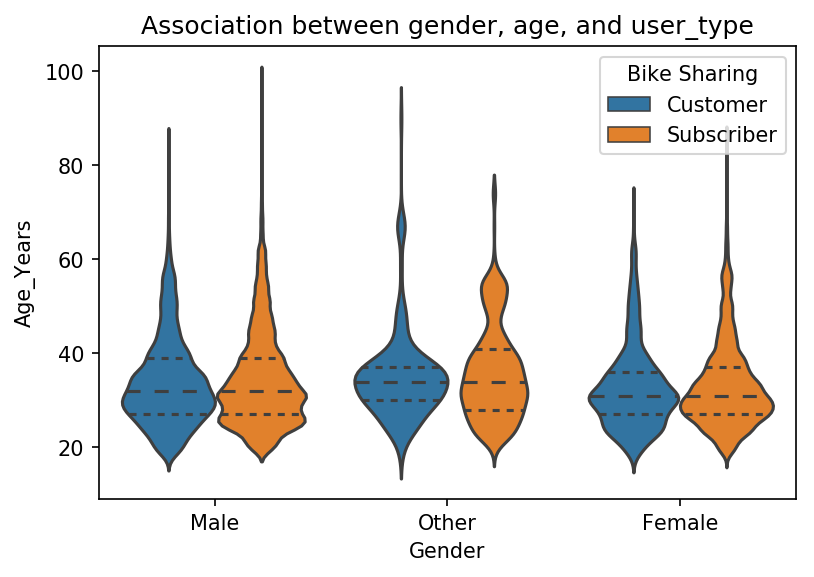

In [171]:
plt.figure(figsize =(6, 4),dpi=150)
sns.violinplot(data = fordgobike_df, x = 'member_gender', y = 'member_age', hue = 'user_type', inner = 'quartile')
plt.xlabel('Gender')
plt.ylabel('Age_Years')
plt.title('Association between gender, age, and user_type')
plt.legend(title='Bike Sharing');

As illustrated above, user_type is associated with younger age groups across all genders. For example, the majority of the participants that share the bike for the full voyage are younger. !


## Conclusions
> It seems reasonable that bike sharing is only available to subscribers. The majority of members are 20-40 year old males who are subscribers and did not share the bike for the entire ride. 
The majority of travels take less than 1000 seconds, while only a few take more than 2000 seconds. Members that are younger are more likely to share the bike.! In addition, user type does not affect age-duration relationships. The female and male gender group who are subscriber were traveling for the shortest duration. While other gender group were traveling for longest duration especially for customer user.


### Saving file for Part Tow:

In [ ]:
fordgobike_df = fordgobike_df.to_csv('fordgobike_df.csv')